# STEP 5: Plot the Veery observations by month

First thing first – let’s load your stored variables and import
libraries.

In [11]:
%store -r
%who

calendar	 ccrs	 ecoregions_gdf	 gbif_gdf	 hvplot	 occurrence_df	 pn	 


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>In the imports cell, we’ve included some packages that you will need.
Add imports for packages that will help you:</p>
<ol type="1">
<li>Make interactive maps with vector data</li>
</ol></div></div>

In [35]:
# Get month names
import calendar

# Libraries for Dynamic mapping
import cartopy.crs as ccrs
import hvplot.pandas
import panel as pn
import pyproj

### Create a simplified `GeoDataFrame` for plotting

Plotting larger files can be time consuming. The code below will
streamline plotting with `hvplot` by simplifying the geometry,
projecting it to a Mercator projection that is compatible with
`geoviews`, and cropping off areas in the Arctic.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Simplify ecoregion data</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Simplify the ecoregions with <code>.simplify(.05)</code>, and save
it back to the <code>geometry</code> column.</li>
<li>Change the Coordinate Reference System (CRS) to Mercator with
<code>.to_crs(ccrs.Mercator())</code></li>
<li>Use the plotting code that is already in the cell to check that the
plotting runs quickly (less than a minute) and looks the way you want,
making sure to change <code>gdf</code> to YOUR <code>GeoDataFrame</code>
name.</li>
</ol></div></div>

<Axes: >

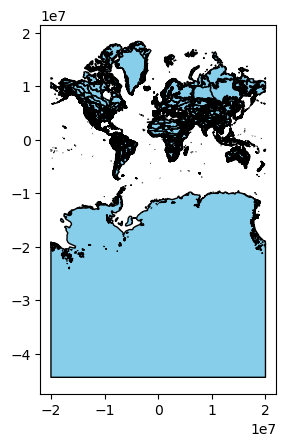

In [24]:
# Simplify the geometry to speed up processing
ecoregions_gdf.geometry = ecoregions_gdf.simplify(
    .05, preserve_topology=False)

# Change the CRS to Mercator for mapping
ecoregions_gdf = ecoregions_gdf.to_crs(ccrs.Mercator())

# Check that the plot runs
ecoregions_gdf.plot(edgecolor='black', color='skyblue')

In [30]:
ecoregions_gdf.hvplot(geo=True, crs=ccrs.Mercator())

ImportError: Geographic projection support requires: geoviews.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Map migration over time</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>If applicable, replace any variable names with the names you defined
previously.</li>
<li>Replace <code>column_name_used_for_ecoregion_color</code> and
<code>column_name_used_for_slider</code> with the column names you wish
to use.</li>
<li>Customize your plot with your choice of title, tile source, color
map, and size.</li>
</ol>
<div data-__quarto_custom="true" data-__quarto_custom_type="Callout"
data-__quarto_custom_context="Block" data-__quarto_custom_id="3">
<div data-__quarto_custom_scaffold="true">

</div>
<div data-__quarto_custom_scaffold="true">
<p>Your plot will probably still change months very slowly in your
Jupyter notebook, because it calculates each month’s plot as needed.
Open up the saved HTML file to see faster performance!</p>
</div>
</div></div></div>

In [32]:
# Join the occurrences with the plotting GeoDataFrame
occurrence_gdf = ecoregions_gdf.join(occurrence_df)

# Get the plot bounds so they don't change with the slider
xmin, ymin, xmax, ymax = occurrence_gdf.total_bounds
occurrence_gdf

OBJECTID                                    ECO_NAME  \
ecoregion month                                                         
12        5          13.0  Alberta-British Columbia foothills forests   
          6          13.0  Alberta-British Columbia foothills forests   
          7          13.0  Alberta-British Columbia foothills forests   
16        4          17.0                 Allegheny Highlands forests   
          5          17.0                 Allegheny Highlands forests   
...                   ...                                         ...   
833       7         839.0            Northern Rockies conifer forests   
          8         839.0            Northern Rockies conifer forests   
          9         839.0            Northern Rockies conifer forests   
839       9         845.0          North Atlantic moist mixed forests   
          10        845.0          North Atlantic moist mixed forests   

                 BIOME_NUM                           BIOME_NAME       REALM  \
ecoregion month                                                               
12        5            5.0            Temperate Conifer Forests    Nearctic   
          6            5.0            Temperate Conifer Forests    Nearctic   
          7            5.0            Temperate Conifer Forests    Nearctic   
16        4            4.0  Temperate Broadleaf & Mixed Forests    Nearctic   
          5            4.0  Temperate Broadleaf & Mixed Forests    Nearctic   
...                    ...                                  ...         ...   
833       7            5.0            Temperate Conifer Forests    Nearctic   
          8            5.0            Temperate Conifer Forests    Nearctic   
          9            5.0            Temperate Conifer Forests    Nearctic   
839       9            4.0  Temperate Broadleaf & Mixed Forests  Palearctic   
          10           4.0  Temperate Broadleaf & Mixed Forests  Palearctic   

                ECO_BIOME_  NNH  ECO_ID  SHAPE_LENG  SHAPE_AREA  \
ecoregion month                                                   
12        5           NE05    2     345   62.333821   17.133639   
          6           NE05    2     345   62.333821   17.133639   
          7           NE05    2     345   62.333821   17.133639   
16        4           NE04    2     328   24.038587    7.958751   
          5           NE04    2     328   24.038587    7.958751   
...                    ...  ...     ...         ...         ...   
833       7           NE05    2     361   56.924527   35.905513   
          8           NE05    2     361   56.924527   35.905513   
          9           NE05    2     361   56.924527   35.905513   
839       9           PA04    3     672   89.144126    5.586107   
          10          PA04    3     672   89.144126    5.586107   

                                          NNH_NAME    COLOR COLOR_BIO  \
ecoregion month                                                         
12        5      Nature Could Reach Half Protected  #5DAD4C   #458970   
          6      Nature Could Reach Half Protected  #5DAD4C   #458970   
          7      Nature Could Reach Half Protected  #5DAD4C   #458970   
16        4      Nature Could Reach Half Protected  #C8EBB1   #00734C   
          5      Nature Could Reach Half Protected  #C8EBB1   #00734C   
...                                            ...      ...       ...   
833       7      Nature Could Reach Half Protected  #ACC13E   #458970   
          8      Nature Could Reach Half Protected  #ACC13E   #458970   
          9      Nature Could Reach Half Protected  #ACC13E   #458970   
839       9                   Nature Could Recover  #378F52   #00734C   
          10                  Nature Could Recover  #378F52   #00734C   

                COLOR_NNH    LICENSE  \
ecoregion month                        
12        5       #7BC141  CC-BY 4.0   
          6       #7BC141  CC-BY 4.0   
          7       #7BC141  CC-BY 4.0   
16        4      

In [33]:

# Define the slider widget
slider = pn.widgets.DiscreteSlider(
    name='month', 
    options={calendar.month_name[i]: i for i in range(1, 13)}
)

# Plot occurrence by ecoregion and month
migration_plot = (
    occurrence_gdf
    .hvplot(
        c='norm_occurrences',
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Veery migration",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        colorbar=False,
        widgets={'month': slider},
        widget_location='bottom'
    )
)

# Save the plot
migration_plot.save('migration.html', embed=True)

# Show the plot
migration_plot

ImportError: Geographic projection support requires: geoviews.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Fix the month labels</div></div><div class="callout-body-container callout-body"><p>Notice that the <code>month</code> slider displays numbers instead of
the month name. Use <code>pn.widgets.DiscreteSlider()</code> with the
<code>options=</code> parameter set to give the months names. You might
want to try asking ChatGPT how to do this, or look at the documentation
for <code>pn.widgets.DiscreteSlider()</code>. This is pretty tricky!</p></div></div>